<a href="https://colab.research.google.com/github/Akhilyadav50/Image-classifier-cifar10/blob/master/image_classifier_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Imports**

In [0]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Conv2D, MaxPooling2D,Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD
from keras.utils import print_summary, to_categorical
from keras.callbacks import ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt

**Loading Dataset**

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

**Defining Model**

In [0]:
Class_labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
              'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [0]:
num_classes = 10

In [0]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

In [0]:
my_model = Sequential()

In [0]:
my_model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
my_model.add(Activation('relu'))
my_model.add(MaxPooling2D(pool_size=(2, 2)))
my_model.add(Dropout(0.3))


In [0]:
my_model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
my_model.add(Activation('relu'))
my_model.add(MaxPooling2D(pool_size=(2, 2)))
my_model.add(Dropout(0.4))


In [0]:
my_model.add(Conv2D(128, (3, 3), padding='same', input_shape=x_train.shape[1:]))
my_model.add(Activation('relu'))
my_model.add(MaxPooling2D(pool_size=(2, 2)))
my_model.add(Dropout(0.5))


In [0]:
my_model.add(Flatten())
my_model.add(Dense(512))
my_model.add(Activation('relu'))
my_model.add(Dropout(0.4))
my_model.add(Dense(num_classes))
my_model.add(Activation('softmax'))

In [29]:
print(my_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_7 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
__________

**Training the Model**

In [0]:
checkpoint = ModelCheckpoint('best_model.h5',  
                             monitor='acc',
                             verbose=1, 
                             save_best_only= True, 
                             mode='auto')            

In [0]:
opt = SGD(lr=0.01, momentum=0.9, decay=0, nesterov=False)
my_model.compile(optimizer= opt,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [32]:
Values = my_model.fit(x_train, y_train,
          batch_size=64,
          epochs=100 ,validation_split=0.2,callbacks=[checkpoint],verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 5s 118us/step - loss: 1.9952 - acc: 0.2536 - val_loss: 1.7805 - val_acc: 0.3657

Epoch 00001: acc improved from -inf to 0.25357, saving model to best_model.h5
Epoch 2/100
40000/40000 [==============================] - 4s 107us/step - loss: 1.6334 - acc: 0.4007 - val_loss: 1.4894 - val_acc: 0.4679

Epoch 00002: acc improved from 0.25357 to 0.40065, saving model to best_model.h5
Epoch 3/100
40000/40000 [==============================] - 4s 107us/step - loss: 1.4827 - acc: 0.4577 - val_loss: 1.3874 - val_acc: 0.4915

Epoch 00003: acc improved from 0.40065 to 0.45767, saving model to best_model.h5
Epoch 4/100
40000/40000 [==============================] - 4s 108us/step - loss: 1.4007 - acc: 0.4907 - val_loss: 1.2759 - val_acc: 0.5566

Epoch 00004: acc improved from 0.45767 to 0.49073, saving model to best_model.h5
Epoch 5/100
40000/40000 [==============================] - 5s 117us/s

**Plotting the Graphs**

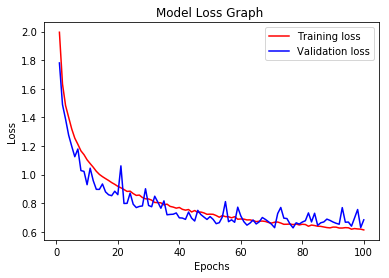

In [33]:
Value_dict = Values.history
loss_values = Value_dict['loss']
val_loss_values = Value_dict['val_loss']

epochs = range(1, len(Value_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Model Loss Graph ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

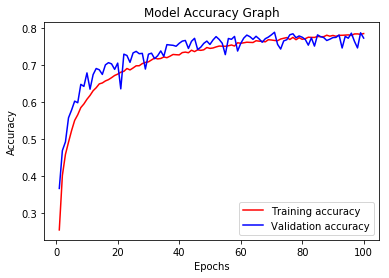

In [34]:
acc_values = Value_dict['acc']
val_acc_values = Value_dict['val_acc']

epochs = range(1, len(Value_dict['acc']) + 1)

plt.plot(epochs, acc_values, 'r', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Model Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [0]:
my_model = load_model('best_model.h5')

**Testing on test Dataset**

In [36]:
result = my_model.evaluate(x_test, y_test, verbose=1)
print('Testing data accuracy is :', result[1]*100)

10000/10000 [==============================] - 1s 81us/step
Testing data accuracy is : 76.28


**// Taking Input from local drive to classify**

In [37]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving img99.jpg to img99.jpg
User uploaded file "img99.jpg" with length 3809 bytes


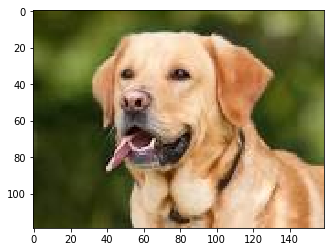

In [38]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("img99.jpg")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

In [0]:
from PIL import Image
im = Image.open('img99.jpg')
newimg = im.resize((32,32))

In [0]:
x=np.array(newimg)
y = np.expand_dims(x, axis=0)

In [41]:
val=my_model.predict_classes(y) 
str='Provided Image belongs to class of : '
mytext=str+Class_labels[val[0]]
print(mytext)

Provided Image belongs to class of : Dog


**/// Input image from Camera to classify**











In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


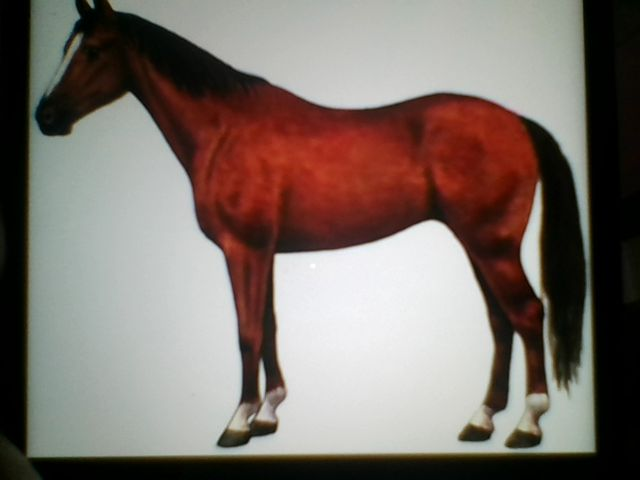

In [43]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  display(Image(filename))
except Exception as err:
  print(str(err))

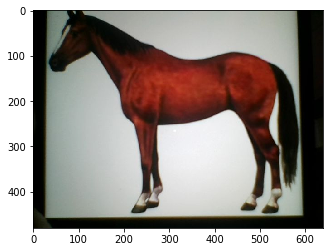

In [44]:
import cv2
img = cv2.imread("photo.jpg")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

In [0]:
from PIL import Image
im = Image.open('photo.jpg')
newimg = im.resize((32,32))

In [0]:
x=np.array(newimg)
y = np.expand_dims(x, axis=0)

In [47]:
val=my_model.predict_classes(y) 
print("Provided Image belongs to class of : ",Class_labels[val[0]])

Provided Image belongs to class of :  Horse
